In [1]:
import sys
!conda install --yes --prefix {sys.prefix} nltk

Solving environment: ...working... done

# All requested packages already installed.



In [2]:
import nltk
import ssl
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
print(stopwords.words("english")[:10])
from nltk.sentiment.vader import SentimentIntensityAnalyzer
s = SentimentIntensityAnalyzer() # en inglés hasta podemos distinguir entre palabras positivas y negativas
print(s.polarity_scores('useless'))
print(s.polarity_scores('marvelous'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4215}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5994}


In [3]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
wr = pd.read_csv("/Users/USUARIO/Documents/GitHub/winemag-data_first150k.csv")
wr

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [4]:
review= ['country', 'description', 'variety']
wr.to_csv('winereviews.csv', columns = review)
wine= pd.read_csv('winereviews.csv')
wine

,Unnamed: 0,country,description,variety
0,0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,White Blend
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,150927,Italy,This classic example comes from a cru vineyard...,White Blend
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Champagne Blend


In [5]:
wine.drop(wine.columns[[0]], axis=1, inplace=True)
wine

,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,White Blend
150926,France,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,Italy,This classic example comes from a cru vineyard...,White Blend
150928,France,"A perfect salmon shade, with scents of peaches...",Champagne Blend


In [6]:
wine['country'].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [7]:
wine.to_csv('wr.csv', index=False)
read = pd.read_csv('wr.csv')
read

,country,description,variety
0,US,This tremendous 100% varietal wine hails from ...,Cabernet Sauvignon
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Tinta de Toro
2,US,Mac Watson honors the memory of a wine once ma...,Sauvignon Blanc
3,US,"This spent 20 months in 30% new French oak, an...",Pinot Noir
4,France,"This is the top wine from La Bégude, named aft...",Provence red blend
...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,White Blend
150926,France,"Offers an intriguing nose with ginger, lime an...",Champagne Blend
150927,Italy,This classic example comes from a cru vineyard...,White Blend
150928,France,"A perfect salmon shade, with scents of peaches...",Champagne Blend


In [37]:
import ssl
import pandas as pd
import os
import matplotlib.pyplot as plt
from wordcloud import wordcloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
wr1= pd.read_csv('/Users/USUARIO/Documents/GitHub/solo-rev.csv', header = None)
wr1

,0,1,2,3
0,NaN,description,country,variety
1,0.0,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
2,1.0,"Ripe aromas of fig, blackberry and cassis are ...",Spain,Tinta de Toro
3,2.0,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
4,3.0,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
...,...,...,...,...
150926,150925.0,Many people feel Fiano represents southern Ita...,Italy,White Blend
150927,150926.0,"Offers an intriguing nose with ginger, lime an...",France,Champagne Blend
150928,150927.0,This classic example comes from a cru vineyard...,Italy,White Blend
150929,150928.0,"A perfect salmon shade, with scents of peaches...",France,Champagne Blend


In [59]:
wr2=wr1.dropna()
wr3=wr2.drop([0],axis=1)
wr3

,1,2,3
1,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
2,"Ripe aromas of fig, blackberry and cassis are ...",Spain,Tinta de Toro
3,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
4,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
5,"This is the top wine from La Bégude, named aft...",France,Provence red blend
...,...,...,...
150926,Many people feel Fiano represents southern Ita...,Italy,White Blend
150927,"Offers an intriguing nose with ginger, lime an...",France,Champagne Blend
150928,This classic example comes from a cru vineyard...,Italy,White Blend
150929,"A perfect salmon shade, with scents of peaches...",France,Champagne Blend


In [60]:
wr3.columns = ['description','country','variety']
wr3

,description,country,variety
1,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
2,"Ripe aromas of fig, blackberry and cassis are ...",Spain,Tinta de Toro
3,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
4,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
5,"This is the top wine from La Bégude, named aft...",France,Provence red blend
...,...,...,...
150926,Many people feel Fiano represents southern Ita...,Italy,White Blend
150927,"Offers an intriguing nose with ginger, lime an...",France,Champagne Blend
150928,This classic example comes from a cru vineyard...,Italy,White Blend
150929,"A perfect salmon shade, with scents of peaches...",France,Champagne Blend


In [56]:
n = len(wr3)
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
reemplazos = []
for r in range(n):
    original = wr3.description[r]
    reemplazo = ''
    if original != 'NaN':
        quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
        reemplazo = ' '.join(quedar)
    reemplazos.append(reemplazo)
wr3['limpios'] = reemplazos
texto = ' '.join(reemplazos)
nube = WordCloud().generate(texto)
plt.rcParams["figure.figsize"] = [15, 7]
plt.imshow(nube)
plt.axis("off")
plt.show()

KeyError: 0

In [61]:
header = ['description','country','variety']
writer = wr3[wr3['country'] == 'US']
writer.to_csv('us-wine.csv', columns = header, index=False)
lol=pd.read_csv('us-wine.csv')
lol

,description,country,variety
0,This tremendous 100% varietal wine hails from ...,US,Cabernet Sauvignon
1,Mac Watson honors the memory of a wine once ma...,US,Sauvignon Blanc
2,"This spent 20 months in 30% new French oak, an...",US,Pinot Noir
3,This re-named vineyard was formerly bottled as...,US,Pinot Noir
4,The producer sources from two blocks of the vi...,US,Pinot Noir
...,...,...,...
62392,"A light, earthy wine, with violet, berry and t...",US,Merlot
62393,"Some raspberry fruit in the aroma, but things ...",US,Pinot Noir
62394,"Old-gold in color, and thick and syrupy. The a...",US,White Riesling
62395,"Decades ago, Beringer’s then-winemaker Myron N...",US,White Blend


In [62]:
header = ['description','country','variety']
writer = wr3[wr3['country'] == 'Italy']
writer.to_csv('italy-wine.csv', columns = header, index=False)
lol = pd.read_csv('italy-wine.csv')
lol

,description,country,variety
0,"Elegance, complexity and structure come togeth...",Italy,Friulano
1,"Underbrush, scorched earth, menthol and plum s...",Italy,Sangiovese
2,"Forest floor, tilled soil, mature berry and a ...",Italy,Sangiovese
3,"Aromas of forest floor, violet, red berry and ...",Italy,Sangiovese
4,"This has a charming nose that boasts rose, vio...",Italy,Sangiovese
...,...,...,...
23473,"Rich and mature aromas of smoke, earth and her...",Italy,Champagne Blend
23474,Made by 30-ish Roberta Borghese high above Man...,Italy,Tocai
23475,Many people feel Fiano represents southern Ita...,Italy,White Blend
23476,This classic example comes from a cru vineyard...,Italy,White Blend


In [64]:
header = ['description','country','variety']
writer = wr3[wr3['country'] == 'Portugal']
writer.to_csv('portugal-wine.csv', columns = header, index=False)
lol= pd.read_csv('portugal-wine.csv')
lol

,description,country,variety
0,"This is a super-ripe, still very young wine. I...",Portugal,Portuguese Red
1,It is the ripe dark Alicante Bouschet that dom...,Portugal,Portuguese Red
2,"The local Baga grape, better known for produci...",Portugal,Baga
3,This family-owned estate has produced an immed...,Portugal,Portuguese Red
4,This state-owned estate of forests and vineyar...,Portugal,Portuguese Red
...,...,...,...
5317,"An easy, fresh, ripe style, with dried fruits ...",Portugal,Port
5318,"This is a very old 40-year old, with some hars...",Portugal,Port
5319,Oreo eaters will enjoy the aromas of this wine...,Portugal,Port
5320,"A powerful, solid wine, packed with luscious f...",Portugal,Port


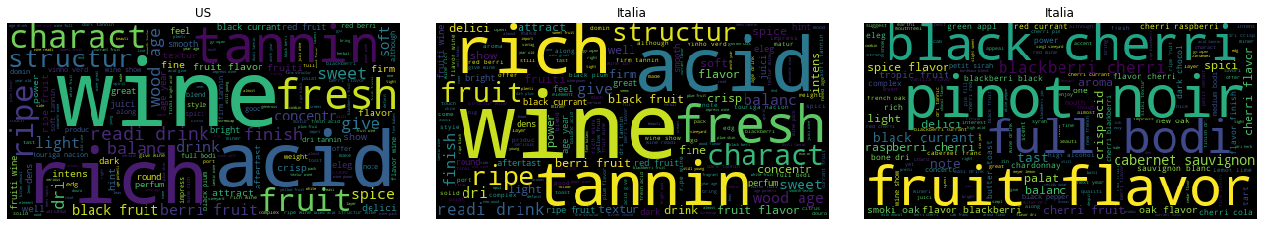

In [66]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer

if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
dini = pd.read_csv("portugal-wine.csv", header = None)
dmcu = pd.read_csv("us-wine.csv", header = None)
dord = pd.read_csv("italy-wine.csv", header = None)
cols = ['description', 'country', 'variety']
dini.columns = cols
dmcu.columns = cols
dord.columns = cols
spa = stopwords.words("english")
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [18, 9]
f = plt.figure() 
lbls = ["Portugal", "US", "Italia"]
i = 1
for d in [dini, dmcu, dord]:
    lbl = lbls.pop(0)
    reemplazos = []
    for r in range(len(d)):
        original = d.description[r]
        reemplazo = ''
        if original != 'NaN':
            quedar = [stemmer.stem(p) for p in tokenizer.tokenize(original) if p.lower() not in spa]
            reemplazo = ' '.join(quedar)
        reemplazos.append(reemplazo)
    d['limpios'] = reemplazos
    for tipo in lbls:
        sf = plt.subplot(3, 3, i)
        i += 1
        texto = ' '.join(reemplazos)
        sf.set_title(tipo)
        nube = WordCloud().generate(texto)
        sf.imshow(nube)
        sf.axis("off")
plt.tight_layout()
plt.show()

In [67]:
import sys
!{sys.executable} -m pip install pyspellchecker

In [ ]:
import ssl
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import RegexpTokenizer
from spellchecker import SpellChecker
sc = SpellChecker()
adicionales = [ 'ready', 'texture']
if getattr(ssl, '_create_unverified_context', None):
    ssl._create_default_https_context = ssl._create_unverified_context
d = pd.read_csv("portugal-wine.csv", header = None)
d.columns = ['description', 'country', 'variety']
spa = stopwords.words("english") 
stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'\w+') # para eliminar puntuación
plt.rcParams["figure.figsize"] = [12, 6]
texto = ''
for original in d.description:
    palabras = tokenizer.tokenize(original)
    revisadas = []
    for p in sc.known(palabras):
        revisadas += [p] * palabras.count(p) # para no alterar las frecuencias       
    for p in sc.unknown(palabras):
         revisadas += [sc.correction(p)] * palabras.count(p)
    inicial = [stemmer.stem(p) for p in revisadas if p.lower() not in spa]
    quedar = [p for p in inicial if p not in adicionales]
    texto += ' '.join(quedar) + ' '
plt.title('')
nube = WordCloud().generate(texto)
plt.imshow(nube)
plt.axis("off")
plt.show()